## Visualization of all training runs

In [1]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

2024-06-13 14:27:00.132460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_3_spider_*/**/*reward_sum*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_3_spider_*/', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_3_spider_*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_3*', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if not "eudist" in file and not "spread_training" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files

['training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_lowlr2/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_spider_lowlr2/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqdqn_3_spider_lowlr2/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_3_small/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_spider_3_small/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqdqn_3_spider_3_small/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_testtt/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/se

In [3]:
# readers = [SummaryReader(file, pivot = True) for file in tb_files]

In [4]:
# log_paths = [reader.log_path for reader in readers]
# display(log_paths)

In [5]:
# reader = SummaryReader(tb_files, pivot = True, extra_columns = {'dir_name'})
# reader = SummaryReader(".", pivot = True, extra_columns = {'dir_name'})
# df = reader.scalars
# df

# pd.set_option('display.max_rows', 500)
dfs = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "sac_3_spider" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    if "rollout/reward_sum" in temp_df.columns:
        temp_df = temp_df[["step", "rollout/reward_sum"]] 
        print(re.sub("training/spiderenv_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)?", "",  reader.log_path)))
        temp_df.insert(2, "dir_name", np.repeat(re.sub("training/spiderenv_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)?", "",  reader.log_path)), len(reader.scalars.index)))
        # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
        temp_df["step"] = temp_df.index
        temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<20000)]

        if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
            temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
        temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
        temp_df = temp_df[temp_df.step > 10]
        temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
        # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
        temp_df.dropna()
        dfs.append(temp_df)
        print("succes")
    else:
        print("reward logs not found")
print("all success")

training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent2
training/spiderenvtraining/seqsacspider
succes
training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0
training/spiderenvtraining/seqsacspider
succes
training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1
training/spiderenvtraining/seqsacspider
succes
training/spiderenv_training/seqdqn_3_spider_lowlr2/tensorboard_logs/rollout_reward_sum_agent2
training/spiderenvtraining/seqdqnspiderlowlr
succes
training/spiderenv_training/seqdqn_3_spider_lowlr2/tensorboard_logs/rollout_reward_sum_agent0
training/spiderenvtraining/seqdqnspiderlowlr
succes
training/spiderenv_training/seqdqn_3_spider_lowlr2/tensorboard_logs/rollout_reward_sum_agent1
training/spiderenvtraining/seqdqnspiderlowlr
succes
training/spiderenv_training/seqdqn_3_spider_3_small/tensorboard_logs/rollout_reward_sum_agent2
training/spiderenvtraining/seqdqnspidersmall
succes
trainin

In [26]:
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
df

,step,rollout/reward_sum,dir_name,avg_reward_sum
50,50,-12.358588,training/spreadtraining/seqsac,-26.440388
75,75,-36.131727,training/spreadtraining/seqsac,-24.750117
100,100,-23.722715,training/spreadtraining/seqsac,-24.766595
125,125,-21.492031,training/spreadtraining/seqsac,-25.608577
150,150,-19.479389,training/spreadtraining/seqsac,-24.603653
...,...,...,...,...
56825,56825,-28.540644,training/spreadtraining/sacspiderlowlr,-30.198371
56850,56850,-25.748823,training/spreadtraining/sacspiderlowlr,-33.761014
56875,56875,-20.464106,training/spreadtraining/sacspiderlowlr,-33.418361
56900,56900,-24.529045,training/spreadtraining/sacspiderlowlr,-34.533875


In [27]:
display(df["dir_name"].unique())

array(['training/spreadtraining/seqsac',
       'training/spreadtraining/seqsaclowlr',
       'training/spreadtraining/seqsachighlr',
       'training/spreadtraining/sacspiderhighlr',
       'training/spreadtraining/sacspider',
       'training/spreadtraining/sacspiderlowlr'], dtype=object)

In [28]:
# df2 = df.loc[(df.index>0)&(df.index<20000)]
df2 = df

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

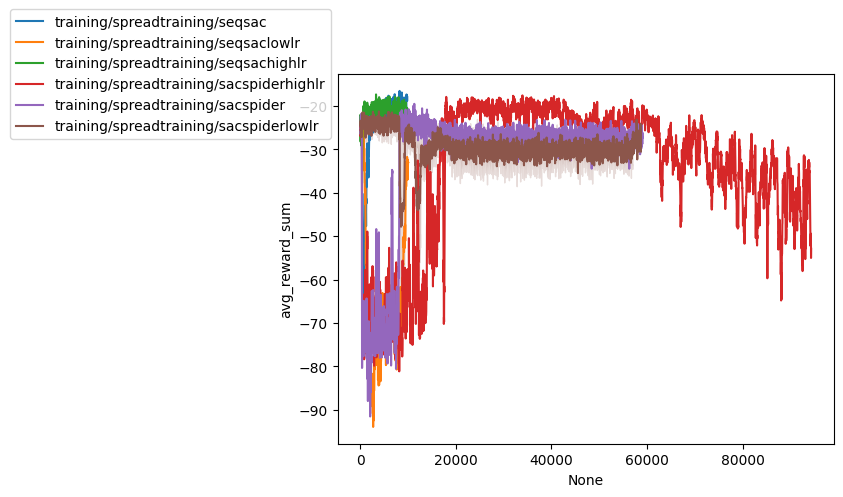

In [29]:
sns.lineplot(data = df2, x = df2.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


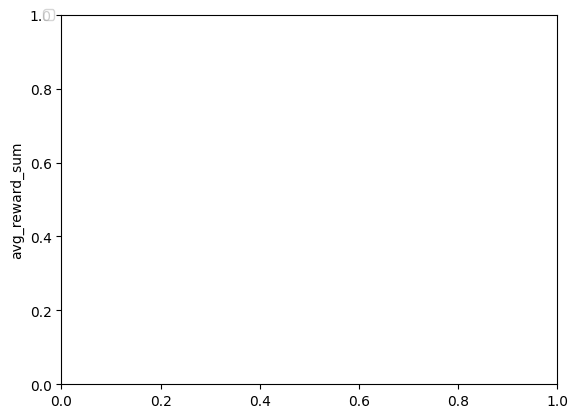

In [30]:
plt.figure()
df3 = df2[df2["dir_name"].str.contains("/dqn")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


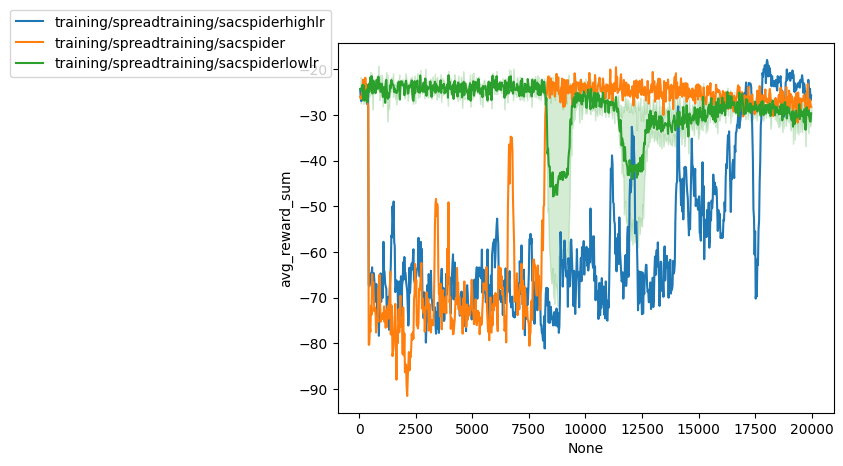

In [31]:
plt.figure()
df3 = df2[df2["dir_name"].str.contains("/sac")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


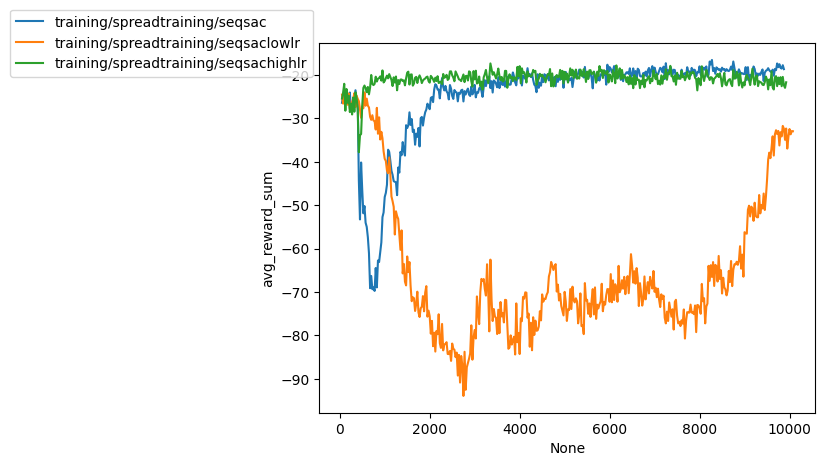

In [32]:
plt.figure()
df3 = df2[df2["dir_name"].str.contains("seqsac")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


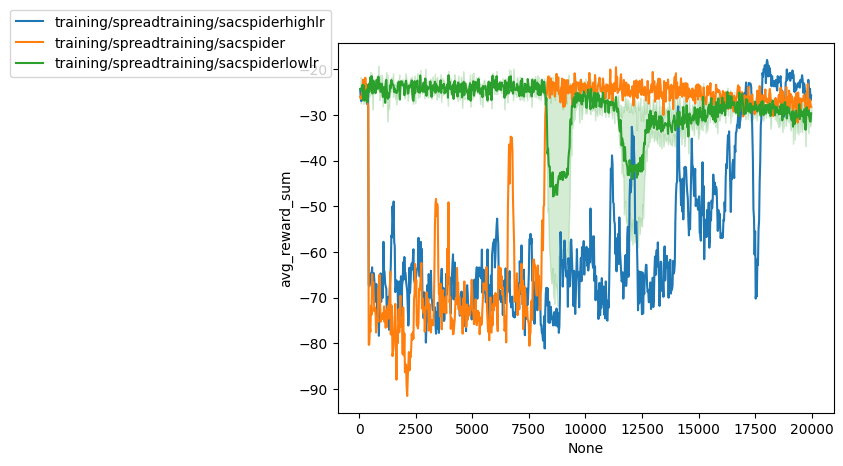

In [33]:
plt.figure()
df3 = df2[df2["dir_name"].str.contains("/sacs")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


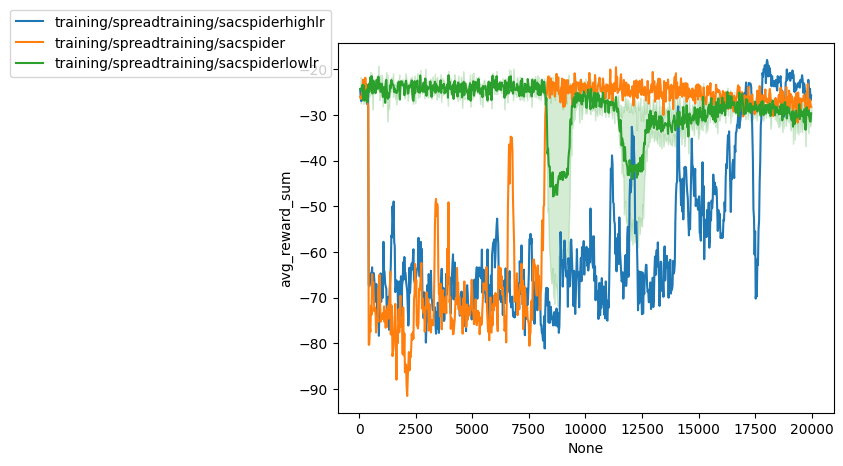

In [34]:
plt.figure()
df3 = df2[df2["dir_name"].str.contains("/sacs")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


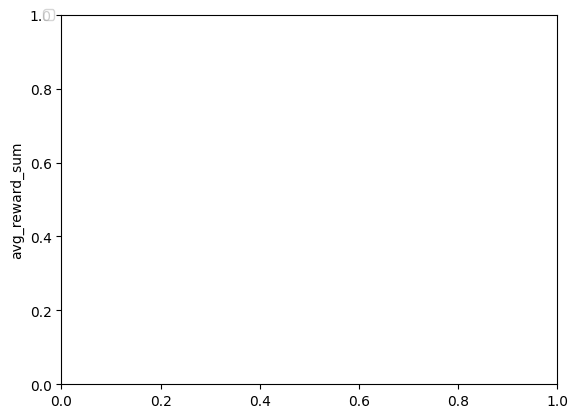

In [35]:
plt.figure()
df3 = df2[df2["dir_name"].str.contains("seqdqn")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


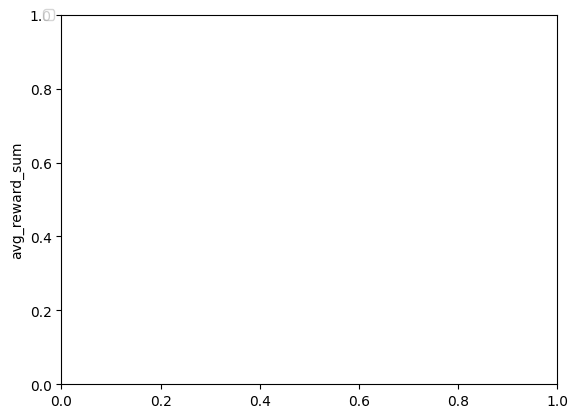

In [36]:
plt.figure()
df3 = df2[df2["dir_name"].str.contains("/dqns")]
df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

In [17]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

In [18]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_3_spider_*/**/*reward_sum*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_3_spider_*/', recursive = True):
    tb_files.append(filename)
for filename in glob('**/seqsac_3_*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_3*', recursive = True):
    tb_files.append(filename)

# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr2" in file]
tb_files = [file for file in tb_files if "spread_training" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files

['training/spread_training/seqsac_3_1',
 'training/spread_training/seqsac_3_1_lowlr',
 'training/spread_training/seqsac_3_1_highlr',
 'training/spread_training/sac_3_spider_highlr',
 'training/spread_training/sac_3_spider_1',
 'training/spread_training/sac_3_spider_lowlr2',
 'training/spread_training/sac_3_spider_lowlr']

In [19]:
# reader = SummaryReader(tb_files, pivot = True, extra_columns = {'dir_name'})
# reader = SummaryReader(".", pivot = True, extra_columns = {'dir_name'})
# df = reader.scalars
# df

# pd.set_option('display.max_rows', 500)
dfs = []
for file in tb_files:
    reader = SummaryReader(file, pivot = True)
    temp_df = reader.scalars
    if "sac_3_spider" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    temp_df = temp_df[["step", "rollout/reward_sum"]] 
    print(re.sub("training/spiderenv_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)?", "",  reader.log_path)))
    temp_df.insert(2, "dir_name", np.repeat(re.sub("training/spiderenv_training/", "", re.sub("(_)?(\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)?", "",  reader.log_path)), len(reader.scalars.index)))
    # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
    temp_df["step"] = temp_df.index
    # temp_df = temp_df.loc[(temp_df.index>0)&(temp_df.index<20000)]

    if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
        temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
    temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
    temp_df = temp_df[temp_df.step > 25]
    temp_df = temp_df[temp_df['avg_reward_sum'].notna()]
    # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
    temp_df.dropna()
    dfs.append(temp_df)
    print("succes")
print("all success")

training/spread_training/seqsac_3_1
training/spreadtraining/seqsac
succes
training/spread_training/seqsac_3_1_lowlr
training/spreadtraining/seqsaclowlr


succes
training/spread_training/seqsac_3_1_highlr
training/spreadtraining/seqsachighlr
succes
training/spread_training/sac_3_spider_highlr
training/spreadtraining/sacspiderhighlr
succes
training/spread_training/sac_3_spider_1
training/spreadtraining/sacspider
succes
training/spread_training/sac_3_spider_lowlr2
training/spreadtraining/sacspiderlowlr
succes
training/spread_training/sac_3_spider_lowlr
training/spreadtraining/sacspiderlowlr
succes
all success


In [20]:
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
df

,step,rollout/reward_sum,dir_name,avg_reward_sum
50,50,-12.358588,training/spreadtraining/seqsac,-26.440388
75,75,-36.131727,training/spreadtraining/seqsac,-24.750117
100,100,-23.722715,training/spreadtraining/seqsac,-24.766595
125,125,-21.492031,training/spreadtraining/seqsac,-25.608577
150,150,-19.479389,training/spreadtraining/seqsac,-24.603653
...,...,...,...,...
56825,56825,-28.540644,training/spreadtraining/sacspiderlowlr,-30.198371
56850,56850,-25.748823,training/spreadtraining/sacspiderlowlr,-33.761014
56875,56875,-20.464106,training/spreadtraining/sacspiderlowlr,-33.418361
56900,56900,-24.529045,training/spreadtraining/sacspiderlowlr,-34.533875


In [21]:
display(df["dir_name"].unique())

array(['training/spreadtraining/seqsac',
       'training/spreadtraining/seqsaclowlr',
       'training/spreadtraining/seqsachighlr',
       'training/spreadtraining/sacspiderhighlr',
       'training/spreadtraining/sacspider',
       'training/spreadtraining/sacspiderlowlr'], dtype=object)

In [22]:
# df2 = df.loc[(df.index>0)&(df.index<20000)]
df4 = df

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-package

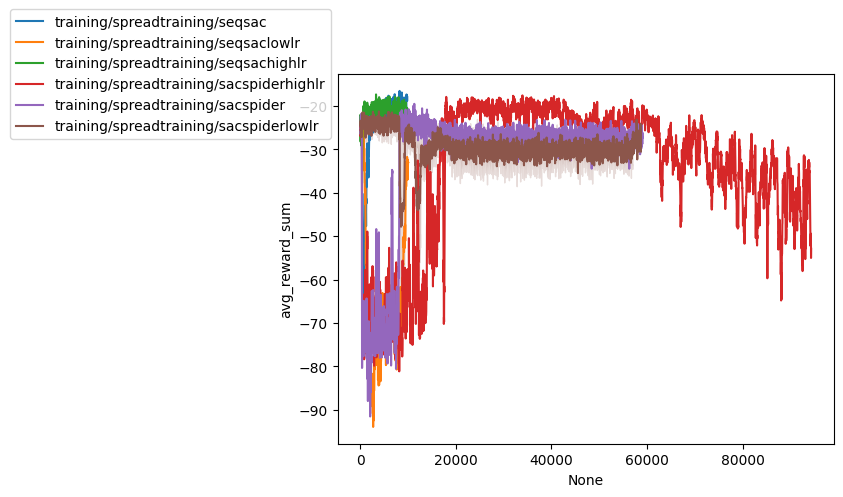

In [23]:
plt.figure()
# df3 = df2[df2["dir_name"].str.contains("/dqns")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df4, x = df4.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


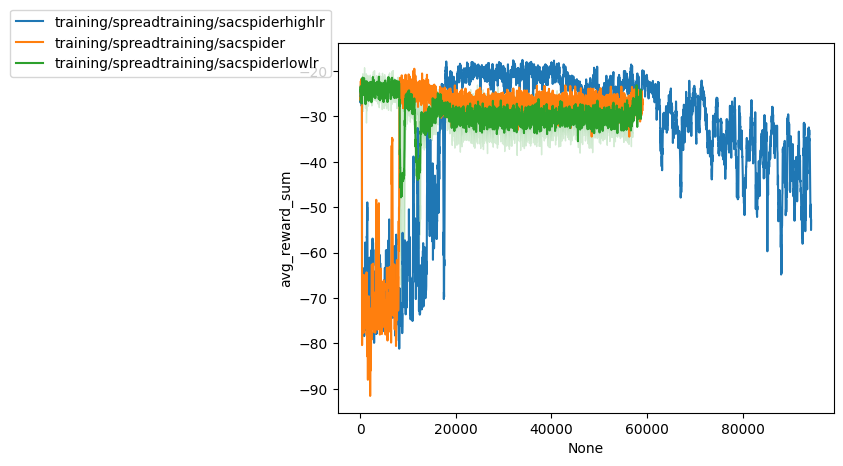

In [24]:
plt.figure()
df5 = df4[df4["dir_name"].str.contains("/sac")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hkolstee/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


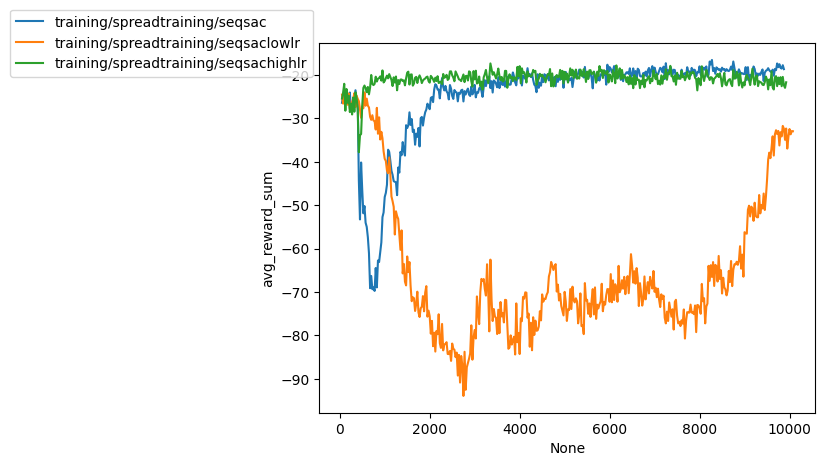

In [25]:
plt.figure()
df5 = df4[df4["dir_name"].str.contains("/seq")]
# df3 = df3.loc[(df3.index>0)&(df3.index<20000)]
sns.lineplot(data = df5, x = df5.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)